In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'C:\Users\haifa\Albayrak Internship\Projects\Classification Tests\iris.data', header =None)

## 1- Describe Data

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.columns = ['Sepal Length',
              'Sepal Width',
              'Petal Length',
              'Petal Width',
              'Class',
              ]
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.dtypes

Sepal Length    float64
Sepal Width     float64
Petal Length    float64
Petal Width     float64
Class            object
dtype: object

In [7]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## 2- Missing Data

In [10]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

<Axes: >

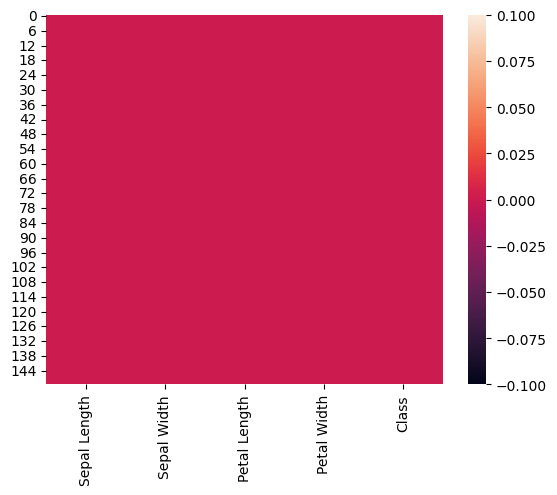

In [11]:
sns.heatmap(df.isnull())

In [12]:
df['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
df['Class'].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

There is no missing values, so no need to do any further steps here

## 3- Data Analysis

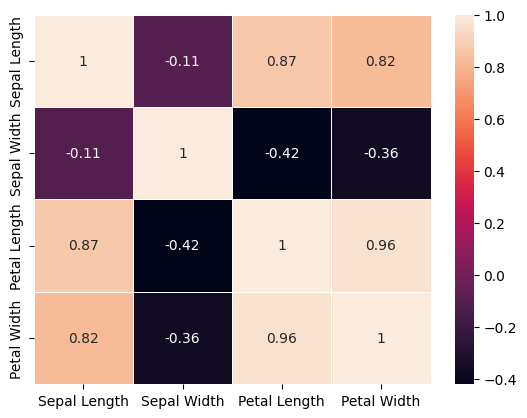

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidth= .5)
plt.show()

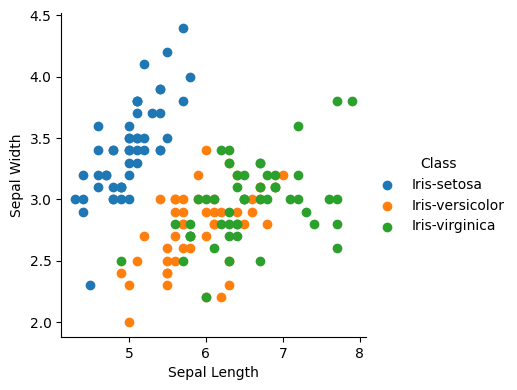

In [15]:
sns.FacetGrid(df, hue='Class', height=4).map(plt.scatter, 'Sepal Length', 'Sepal Width').add_legend()

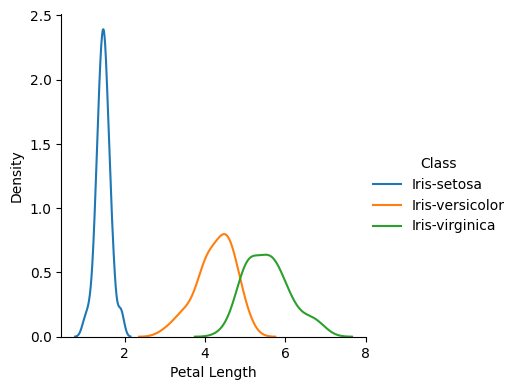

In [16]:
sns.FacetGrid(df, hue="Class", height=4).map(sns.kdeplot, "Petal Length").add_legend()

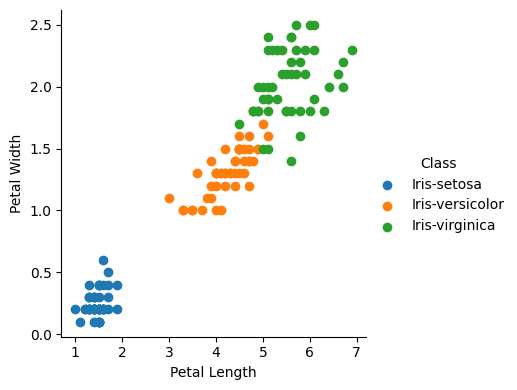

In [17]:
sns.FacetGrid(df, hue='Class', height=4).map(plt.scatter, 'Petal Length', 'Petal Width').add_legend()

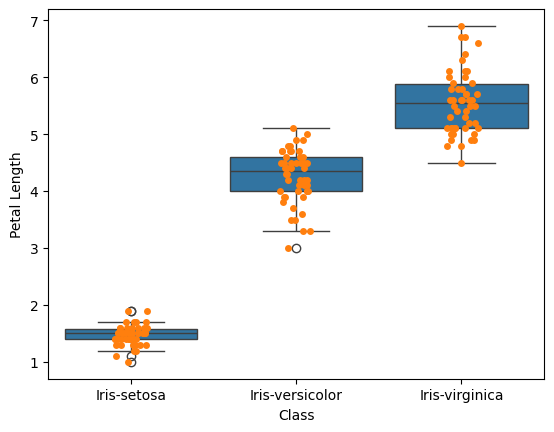

In [18]:
ax= sns.boxplot(x='Class', y='Petal Length', data=df)
ax=sns.stripplot(df, x='Class', y='Petal Length', jitter=True)


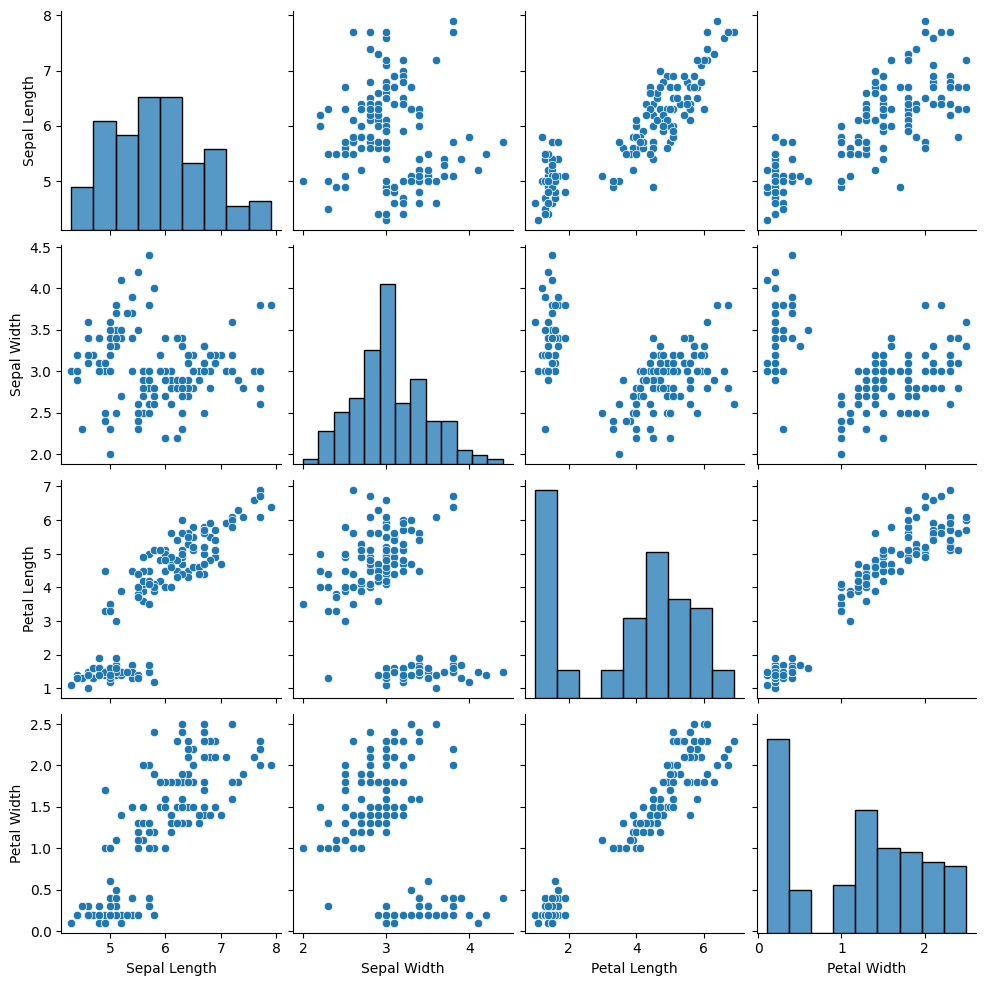

In [19]:
sns.pairplot(data= df)

array([[<Axes: title={'center': 'Petal Length'}, xlabel='[Class]'>,
        <Axes: title={'center': 'Petal Width'}, xlabel='[Class]'>],
       [<Axes: title={'center': 'Sepal Length'}, xlabel='[Class]'>,
        <Axes: title={'center': 'Sepal Width'}, xlabel='[Class]'>]],
      dtype=object)

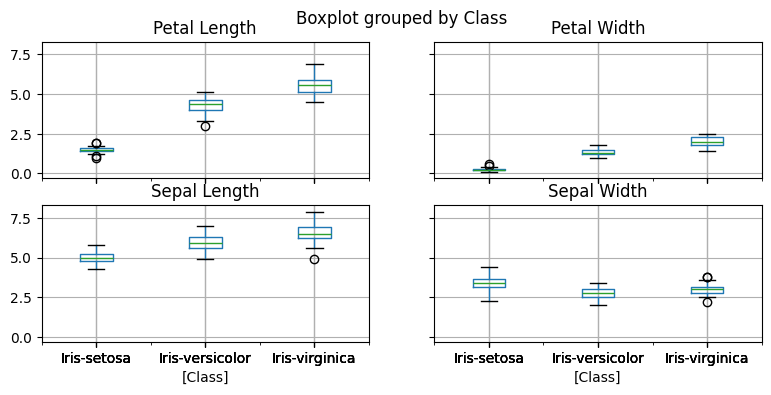

In [20]:
df.boxplot(by='Class', figsize=(9,4))

## 6- Create Model

In [21]:
x = df[['Sepal Length','Sepal Width','Petal Length','Petal Width']]# taking the training data features
y = df.Class

In [22]:
# Encode the target labels he labels are 'Iris-setosa', 'Iris-versicolor', and 'Iris-virginica', LabelEncoder will map them to 0, 1, and 2, respectively.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [23]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,train_size=.3)

In [24]:
accuracies =[]

In [25]:
def all(model):
    model.fit(x_Train, y_Train)
    pre = model.predict(x_Test)
    accuracy =accuracy_score(pre,y_Test)
    print('Accuracy =', accuracy)
    accuracies.append(accuracy)

In [26]:
model1 = LogisticRegression()
all(model1)

Accuracy = 0.9523809523809523


In [27]:
model2 = KNeighborsClassifier()
all(model2)

Accuracy = 0.9238095238095239


In [28]:
model3 = SVC()
all(model3)

Accuracy = 0.9238095238095239


In [ ]:
model4 = GaussianNB()
all(model4)

Accuracy = 0.9619047619047619


In [30]:
model5 = DecisionTreeClassifier()
all(model5)

Accuracy = 0.9619047619047619


In [31]:
model6 = RandomForestClassifier()
all(model6)

Accuracy = 0.9619047619047619


In [32]:
model7 = GradientBoostingClassifier()
all(model7)

Accuracy = 0.9523809523809523


In [33]:
# eval_metric specifies the evaluation metric used during training to assess the performance of the model. 'mlogloss' stands for "multiclass logarithmic loss," which is a metric commonly used for evaluating multi-class classification problems. It measures the performance of a classification model whose output is a probability value between 0 and 1. Lower values indicate better performance.
model8 = XGBClassifier(eval_metric='mlogloss')
all(model8)



Accuracy = 0.9238095238095239


In [34]:
algorithms =['Logistic Regression', 'KNeighborsClassifier', 'SVC','GaussianNB','DecisionTreeClassifier','RandomForestClassifier', 'GradientBoostingClassifier',
             'XGboost'
            ]

In [35]:
new = pd.DataFrame({'algorithms' : algorithms , 'accuracies' : accuracies})

In [36]:
new

,algorithms,accuracies
0,Logistic Regression,0.952381
1,KNeighborsClassifier,0.923810
2,SVC,0.923810
3,GaussianNB,0.961905
4,DecisionTreeClassifier,0.961905
5,RandomForestClassifier,0.961905
6,GradientBoostingClassifier,0.952381
7,XGboost,0.923810


- We can notice that the best one is KNeighborsClassifier, KNN model performs very well on the Iris dataset, with an overall accuracy of 99%.

In [37]:
modelF= KNeighborsClassifier()
modelF.fit(x_Train, y_Train)
all(modelF)

Accuracy = 0.9238095238095239


In [38]:
Actual =y # This assigns the true labels (y) to the variable Actual
predicted = modelF.predict(x) #This makes predictions on the entire feature set x using the trained model.

In [39]:
print (metrics.classification_report(Actual,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.89      0.94      0.91        50
           2       0.94      0.88      0.91        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



- Precision: The ratio of correctly predicted positive observations to the total predicted positives. It answers the question, "Of all instances classified as positive, how many are actually positive?"
- Recall (Sensitivity): The ratio of correctly predicted positive observations to all observations in the actual class. It answers the question, "Of all the actual positives, how many were correctly classified?"
- F1-Score: The weighted average of Precision and Recall. It tries to find the balance between precision and recall
- Support: The number of actual occurrences of the class in the dataset.

Class 0 (First kind):
* Precision: 1.00 (all predicted instances for class 0 are correct)
* Recall: 1.00 (all actual instances of class 0 are correctly predicted)
* F1-Score: 1.00 (perfect balance between precision and recall)
* Support: 50 (there are 50 instances of class 0 in the dataset)

Class 1 (second kind):
* Precision: 1.00 (all predicted instances for class 0 are correct)
* Recall: 0.98 (98% of actual instances of class 1 are correctly predicted)
* F1-Score: 0.99
* Support: 50

Class 2 (third kind):
* Precision: 0.98 (98% of predicted instances for class 2 are correct)
* Recall: 1.00 (all actual instances of class 2 are correctly predicted)
* F1-Score: 0.99
* Support: 50

In [40]:
input_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
predicte = modelF.predict(input_data)
# The inverse_transform method converts the integer labels back to the original string labels.
predicte_str = label_encoder.inverse_transform(predicte)
predicte_str

array(['Iris-setosa'], dtype=object)